# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Save config info

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "APPID=" + api_key + "&units=" + units + "&q="

name = []
country = []
lat = []
long = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []


print('Beginning Data Retrieval')
print('-----------------------------------------')


#Build query
for city in cities:
    
    #time delay
    time.sleep(1.001)
    
    #Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()

    try:
        name.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        lat.append(weather_json['coord']['lat'])
        long.append(weather_json['coord']['lon'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])

    except KeyError:
        print("City not found.  Skipping... ")
    
    print(f"Processing data for city = {city}.")


Beginning Data Retrieval
-----------------------------------------
Processing data for city = alice springs.
City not found.  Skipping... 
Processing data for city = vaitupu.
Processing data for city = puerto narino.
Processing data for city = hermanus.
Processing data for city = busselton.
Processing data for city = pendleton.
Processing data for city = chokurdakh.
Processing data for city = san policarpo.
Processing data for city = panaba.
Processing data for city = qaanaaq.
Processing data for city = ushuaia.
Processing data for city = atuona.
Processing data for city = alexandria.
Processing data for city = torma.
Processing data for city = kaitangata.
Processing data for city = bluff.
Processing data for city = arica.
Processing data for city = port alfred.
Processing data for city = longyearbyen.
Processing data for city = nikolskoye.
City not found.  Skipping... 
Processing data for city = taipao.
City not found.  Skipping... 
Processing data for city = taolanaro.
Processing dat

City not found.  Skipping... 
Processing data for city = karkaralinsk.
Processing data for city = teya.
Processing data for city = tottori.
Processing data for city = krasnyy chikoy.
Processing data for city = carupano.
Processing data for city = los llanos de aridane.
Processing data for city = yeppoon.
Processing data for city = saskylakh.
Processing data for city = mudgee.
Processing data for city = salalah.
Processing data for city = mugur-aksy.
Processing data for city = puri.
Processing data for city = sungurlu.
Processing data for city = kalispell.
Processing data for city = say.
Processing data for city = bathsheba.
Processing data for city = sainte-rose.
Processing data for city = dunedin.
Processing data for city = carutapera.
City not found.  Skipping... 
Processing data for city = korla.
Processing data for city = ballina.
Processing data for city = bilma.
Processing data for city = biak.
Processing data for city = joshimath.
Processing data for city = castro.
Processing da

Processing data for city = hannibal.
City not found.  Skipping... 
Processing data for city = ambodifototra.
Processing data for city = atambua.
Processing data for city = patacamaya.
Processing data for city = ponta do sol.
Processing data for city = vilhena.
Processing data for city = trairi.
Processing data for city = saraland.
Processing data for city = labuhan.
City not found.  Skipping... 
Processing data for city = sentyabrskiy.
Processing data for city = olinda.
Processing data for city = mattru.
Processing data for city = moose factory.
Processing data for city = reitz.
Processing data for city = dunda.
Processing data for city = hamilton.
Processing data for city = saint-augustin.
Processing data for city = tabou.
Processing data for city = methoni.
Processing data for city = kruisfontein.
Processing data for city = seoul.
Processing data for city = myitkyina.
Processing data for city = port macquarie.
City not found.  Skipping... 
Processing data for city = mooi river.
Proce

Processing data for city = tongliao.
Processing data for city = lahaina.
Processing data for city = polovinnoye.
Processing data for city = kaniama.
Processing data for city = basoko.
Processing data for city = port blair.
Processing data for city = nampula.
Processing data for city = luganville.
Processing data for city = hervey bay.
City not found.  Skipping... 
Processing data for city = samalaeulu.
Processing data for city = stephenville.
Processing data for city = tiznit.
Processing data for city = marsa matruh.
Processing data for city = honningsvag.
Processing data for city = aswan.
Processing data for city = marivan.
Processing data for city = sakaraha.
Processing data for city = cedar city.
Processing data for city = lewiston.
Processing data for city = paamiut.
Processing data for city = barsovo.
Processing data for city = nyurba.
Processing data for city = corinto.
Processing data for city = jericho.
Processing data for city = gawler.
Processing data for city = fort nelson.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_transposed = zip(name,country,lat,long,temp_max,humidity,cloudiness,windspeed)
weather_df = pd.DataFrame(weather_transposed, columns=['City','Country','Latitude',
                                                       'Longitude','Max Temperature',
                                                       'Humidity','Cloudiness','Wind Speed'])

weather_df.to_csv('city_data.csv')

weather_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Alice Springs,AU,-23.70,133.88,77.00,12,0,14.99
1,Puerto Narino,CO,-3.77,-70.38,78.80,94,75,3.36
2,Hermanus,ZA,-34.42,19.24,57.00,93,100,16.60
3,Busselton,AU,-33.64,115.35,52.00,68,71,9.13
4,Pendleton,US,34.65,-82.78,80.60,44,1,3.36
...,...,...,...,...,...,...,...,...
560,Corinto,CO,3.17,-76.26,80.60,61,40,13.87
561,Jericho,PS,31.86,35.46,77.00,60,12,8.05
562,Gawler,AU,-34.60,138.75,57.99,81,0,9.29
563,Fort Nelson,CA,58.81,-122.69,41.00,56,90,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

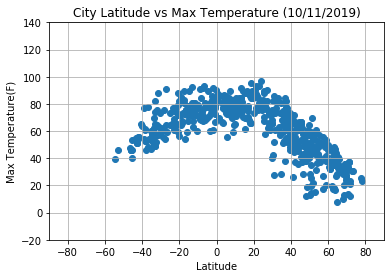

In [33]:
# Build a scatter plot for Latitude vs Max Temp
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-20,140])

# Save the figure
plt.savefig("TemperatureInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

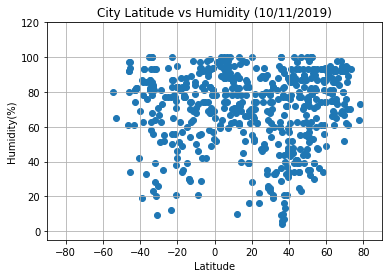

In [35]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-5,120])


# Save the figure
plt.savefig("HumidityInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

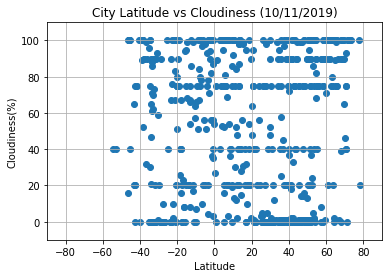

In [36]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-10,110])

# Save the figure
plt.savefig("CloudinessInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

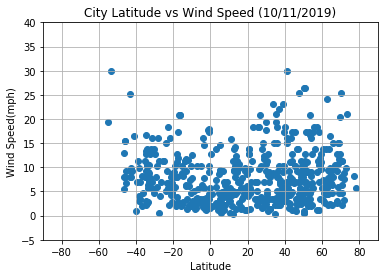

In [38]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-5,40])

# Save the figure
plt.savefig("WindSpeedInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

Observations:

1) 